## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [4]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0)
]

In [5]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

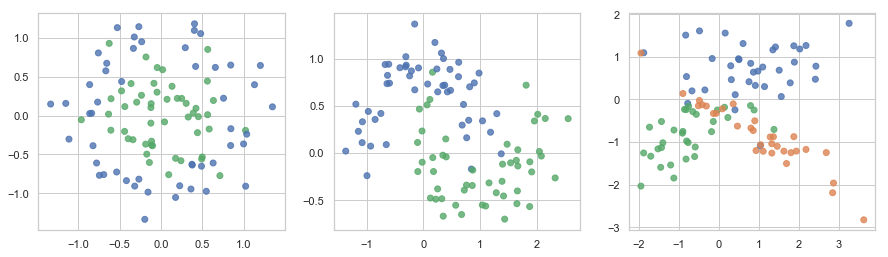

In [12]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

In [22]:
datasets

[(array([[-0.14065238, -0.6035081 ],
         [ 0.56009676,  0.44479453],
         [-0.36219109,  0.41330156],
         [ 0.62974996, -0.61018282],
         [ 1.02275688, -0.90932677],
         [ 0.37738239, -0.63698396],
         [-0.83819947,  0.03126708],
         [-0.33913945, -0.31011642],
         [ 0.40257595,  1.09828099],
         [ 0.84405962, -0.16877927],
         [-0.66753076,  0.57740171],
         [-0.77891918, -0.6104695 ],
         [ 0.04241406, -0.08067323],
         [-0.69223636, -0.75953931],
         [ 0.32904952, -0.01808306],
         [ 1.20089078,  0.64650029],
         [-0.4374455 ,  0.11665946],
         [-0.60635598, -0.18757812],
         [-0.23369433,  0.95225723],
         [-0.53644037, -0.72648559],
         [ 0.24969991,  0.221937  ],
         [ 0.17621191, -0.55016629],
         [-0.82213046, -0.38759808],
         [ 0.3617658 , -0.94565657],
         [-0.62647445,  0.93100624],
         [-0.52827015,  1.13403338],
         [ 0.17580487, -1.05381401],
 

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [8]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

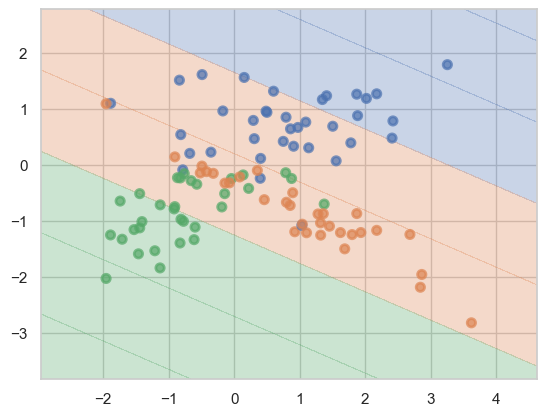

In [19]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

1 Обучающая выборка - 1.0
1 Тестовая выборка - 0.7
2 Обучающая выборка - 1.0
2 Тестовая выборка - 0.8
3 Обучающая выборка - 1.0
3 Тестовая выборка - 0.75


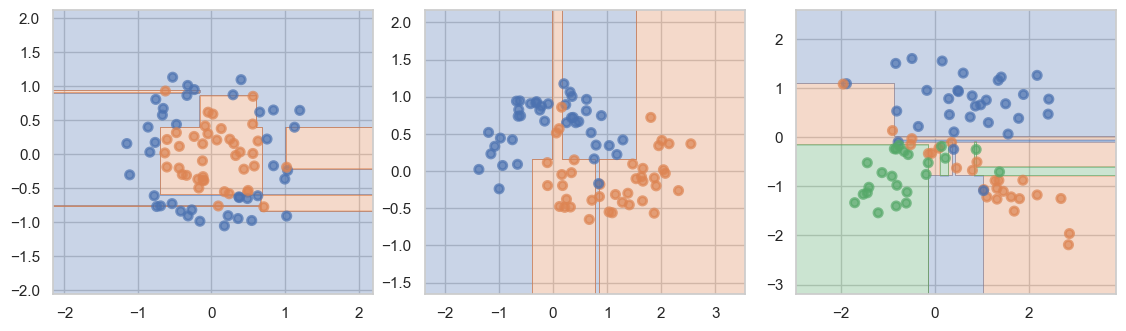

In [21]:
plt.figure(figsize=(12, 4))
for i, data in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    
    X, y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    plot_surface(tree, X_train, y_train)

    print(f"{i + 1} Обучающая выборка -", tree.score(X_train, y_train))
    print(f"{i + 1} Тестовая выборка -", tree.score(X_test, y_test))

__Ответ:__ __Модель сильно переобучилась, низкая точность на тестовой выборке__

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [19]:
max_depth_array = [4, 8]
min_samples_leaf_array = [4, 8]


def count_tree(data):
    X, y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
    
    fig = plt.figure(figsize=(8, 8))
    
    for i, max_depth in enumerate(max_depth_array):
        for j, min_samples_leaf in enumerate(min_samples_leaf_array):
            plt.subplot(2, 2, i * 2 + j + 1)

            tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            tree.fit(X_train, y_train)
            
            plot_surface(tree, X_train, y_train)
            
            score_train = round(tree.score(X_train, y_train), 2)
            score_test = round(tree.score(X_test, y_test), 2)
            
            title = f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, \n"
            title += f"accuracy: train-{score_train}, test-{score_test}"
            plt.title(title, fontsize=13)

 __min_samples_leaf = 4, 8__ 
 
 __max_depth = 4, 8__ 

__1й Датасет__

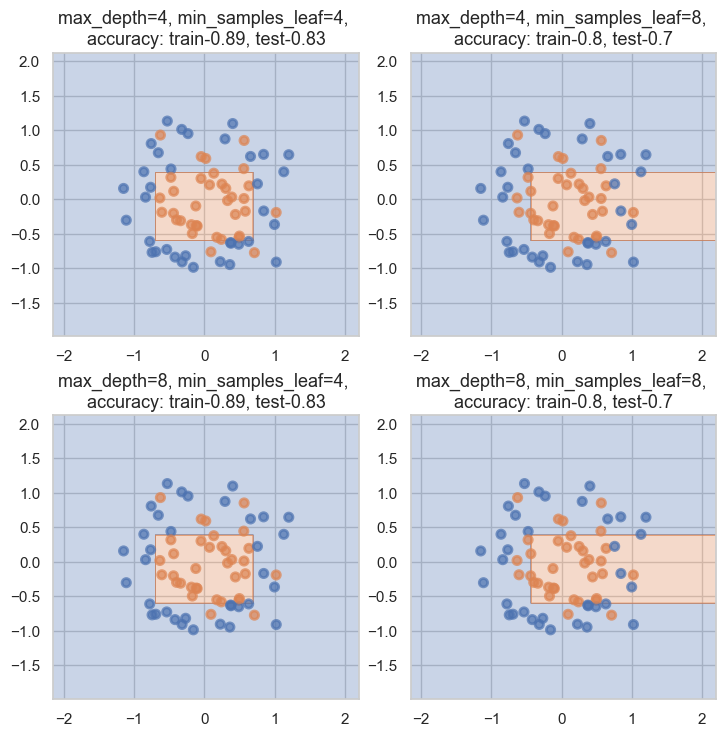

In [20]:
count_tree(datasets[0])

__2й Датасет__

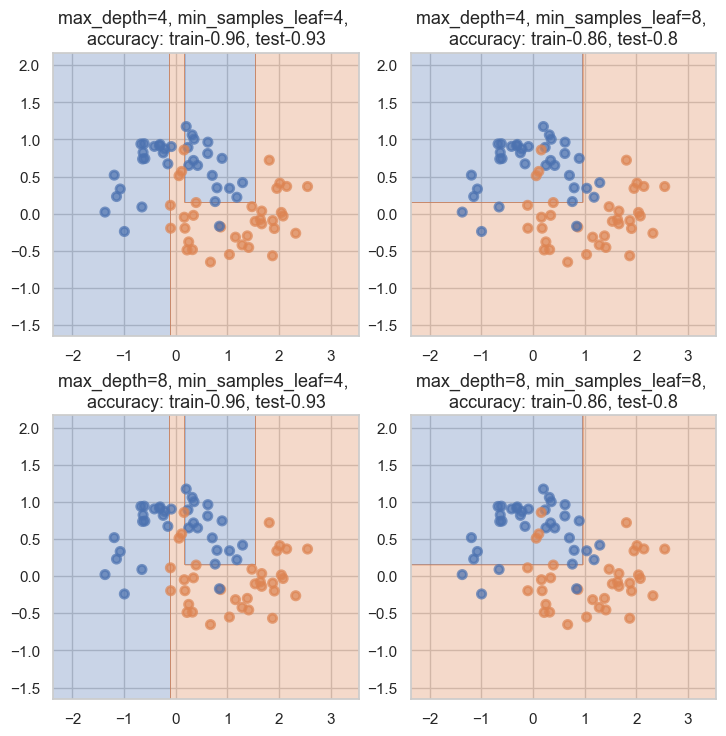

In [21]:
count_tree(datasets[1])

__3й Датасет__

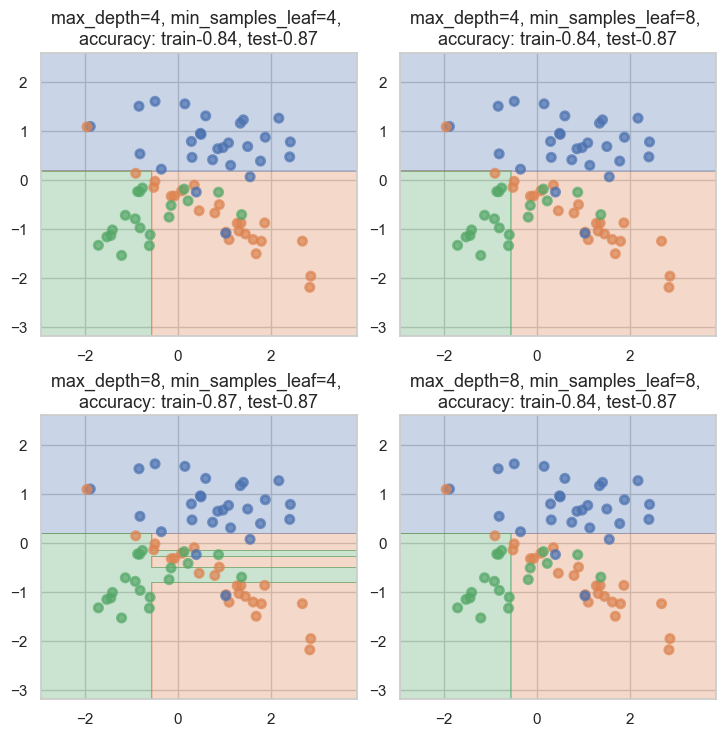

In [22]:
count_tree(datasets[2])

__Ответ: Увеличение максимально возможного числа объектов в листе и уменьшение максмально возможной глубины дерева приводит к неточным результатам, а точность вычислений снижается. Для каждой выборки лучшие значения отличаются_____

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [28]:
import pandas as pd
students = pd.read_csv('students.csv')
students.head(10)

,Unnamed: 0,STG,SCG,STR,LPR,PEG,UNS
0,0,0.00,0.00,0.00,0.00,0.00,0
1,1,0.08,0.08,0.10,0.24,0.90,1
2,2,0.06,0.06,0.05,0.25,0.33,0
3,3,0.10,0.10,0.15,0.65,0.30,1
4,4,0.08,0.08,0.08,0.98,0.24,0
5,5,0.09,0.15,0.40,0.10,0.66,1
6,6,0.10,0.10,0.43,0.29,0.56,1
7,7,0.15,0.02,0.34,0.40,0.01,0
8,8,0.20,0.14,0.35,0.72,0.25,0
9,9,0.00,0.00,0.50,0.20,0.85,1


In [29]:
students.drop(students.columns[[0]], axis = 1, inplace = True)

In [31]:
students.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
5,0.09,0.15,0.40,0.10,0.66,1
6,0.10,0.10,0.43,0.29,0.56,1
7,0.15,0.02,0.34,0.40,0.01,0
8,0.20,0.14,0.35,0.72,0.25,0
9,0.00,0.00,0.50,0.20,0.85,1


In [32]:
train = students
test = students
train.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [33]:
last_column = train.columns[-1]
y_train = np.array(train[last_column])
x_train = train.drop(columns=last_column)
y_test = np.array(test[last_column])
x_test = test.drop(columns=last_column)
x_train.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


Text(0, 0.5, 'Значение критерия Джини')

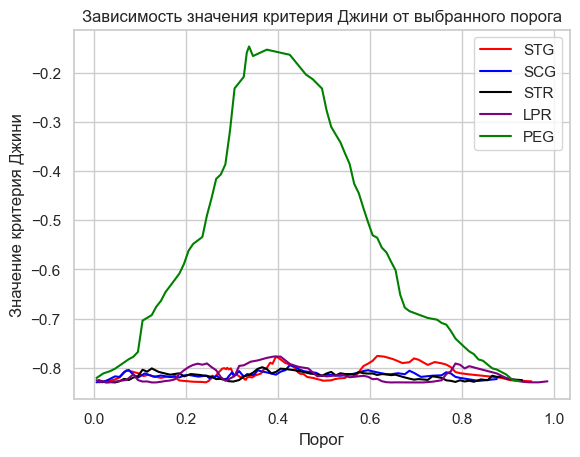

In [36]:
colors = ["red", "blue", "black", "purple", "green"]
for i, column in enumerate(x_train.columns):
    feature = np.array(x_train[column])
    thresholds, gini, threshold_best, gini_best = hw5code.find_best_split(feature, y_train)
    plt.plot(thresholds, gini, c=colors[i], label=column)
plt.legend()
plt.title('Зависимость значения критерия Джини от выбранного порога')
plt.xlabel("Порог")
plt.ylabel("Значение критерия Джини")

__Визуализировал графики "Значение признака — класс" для всех пяти признаков из нашей исходной таблицы__

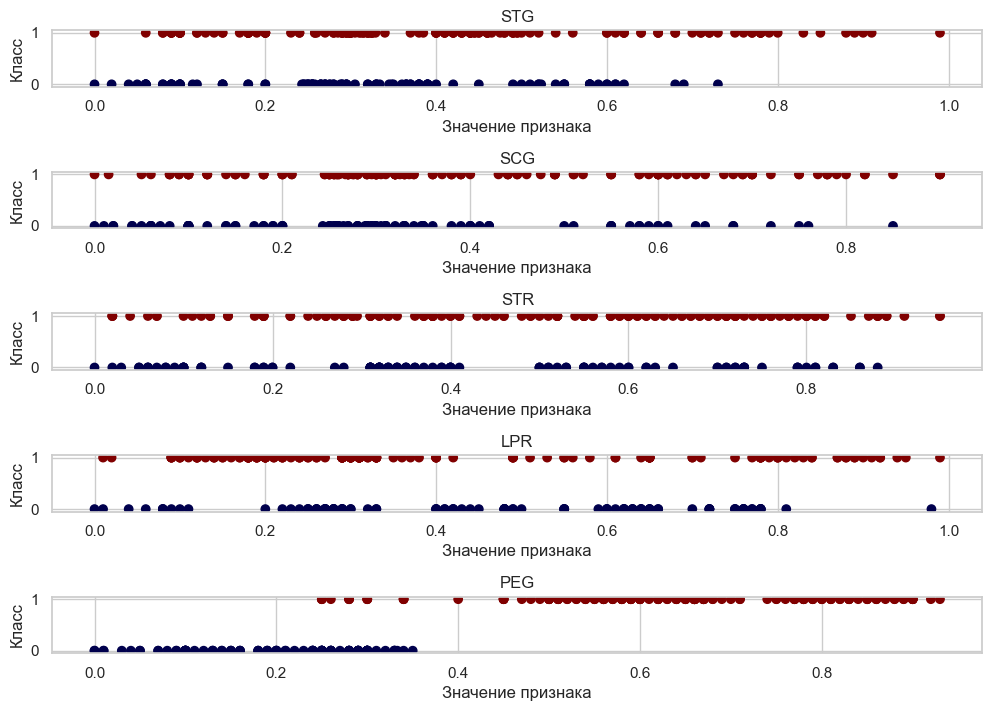

In [44]:
plt.figure(figsize=(12, 7))
plt.subplots_adjust(top=1, hspace=1.5)
for i, column in enumerate(x_train.columns):
    plt.subplot(5, 1, i + 1)
    feature = np.array(x_train[column])
    plt.scatter(feature, y_train, c = y_train, cmap='seismic')
    plt.title(column)
    plt.xlabel("Значение признака")
    plt.ylabel("Класс")

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

__Ответ:__

 __1.Лучший критерий для разделения - "PEG". Это видно по графику с критерием Джини;__

__2.Это согласуется с полученными scatter-графиками. Мы видим, что граница на графике проходит в точке 0,4, при этом на графике критерия Джини мы получили тот же результат;__

__3.Кривая для "хороших" признаков имеет ярко выраженную точку максимума, что помогает точнее разделить данные по признаку. Кривые признаков, по которым деление практически невозможно, находятся в окрестности одной точки.__

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [93]:
mushrooms = pd.read_csv('agaricus-lepiota.data')

In [94]:
mushrooms.head(5)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [95]:
mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)

In [96]:
mushrooms.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [106]:
labelencoder = LabelEncoder()
for column in mushrooms.columns:
    mushrooms[column] = labelencoder.fit_transform(mushrooms[column])
mushrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [108]:
target = mushrooms.loc[:, 0]
features = mushrooms.drop(columns=[0])
x_train, x_test, y_train, y_test = train_test_split(features.values, target.values,
                                                    test_size=0.5, random_state=42)
x_train.shape, y_train.shape

((4062, 22), (4062,))

__Подготовил данные для train и test__

In [110]:
types = ["real"] * x_train.shape[1]
tree = DecisionTree(feature_types=types)
tree.fit(x_train, y_train)
print("Accuracy train -", accuracy_score(y_train, tree.predict(x_train)))
print("Accuracy test -", accuracy_score(y_test, tree.predict(x_test)))

Accuracy train - 1.0
Accuracy test - 1.0


__Обучение прошло успешно__

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [125]:
from sklearn.preprocessing import OneHotEncoder

In [152]:
tic_tac_toe = pd.read_csv('tic-tac-toe.data', header=None)
cars = pd.read_csv('car.data', header=None)
nursery = pd.read_csv('nursery.data', header=None)

In [153]:
tic_tac_toe.head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [154]:
tic_tac_toe = tic_tac_toe.apply(labelencoder.fit_transform)
targets_tic = np.array(tic_tac_toe.iloc[:, 9])
features_tic = np.array(tic_tac_toe.iloc[:, :9])
tic_tac_toe.head()

,0,1,2,3,4,5,6,7,8,9
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [155]:
cars.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [157]:
cars.loc[(cars[6] == 'unacc'), 'unacc'] = 0
cars.loc[(cars[6] == 'acc'), 'unacc'] = 0
cars.loc[(cars[6] == 'good'), 'unacc'] = 1
cars.loc[(cars[6] == 'vgood'), 'unacc'] = 1

cars = cars.apply(labelencoder.fit_transform)
targets_cars = np.array(cars.iloc[:, 6])
features_cars = np.array(cars.iloc[:, :6])
cars.head()

,0,1,2,3,4,5,6,unacc
0,3,3,0,0,2,1,2,0
1,3,3,0,0,2,2,2,0
2,3,3,0,0,2,0,2,0
3,3,3,0,0,1,1,2,0
4,3,3,0,0,1,2,2,0


In [158]:
nursery.head()

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [159]:
nursery.loc[(nursery[8] == 'not_recom'), 'recommend'] = 0
nursery.loc[(nursery[8] == 'recommend'), 'recommend'] = 0
nursery.loc[(nursery[8] == 'very_recom'), 'recommend'] = 1
nursery.loc[(nursery[8] == 'priority'), 'recommend'] = 1
nursery.loc[(nursery[8] == 'spec_prior'), 'recommend'] = 1

nursery = nursery.apply(labelencoder.fit_transform)
targets_nursery = np.array(nursery.iloc[:, 8])
features_nursery = np.array(nursery.iloc[:, :8])
nursery.head()

,0,1,2,3,4,5,6,7,8,recommend
0,2,3,0,0,0,0,0,2,2,0
1,2,3,0,0,0,0,0,1,1,1
2,2,3,0,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2,0
4,2,3,0,0,0,0,2,1,1,1


In [160]:
results = pd.DataFrame(index = ['musrooms', 'tic_tac_toe', 'cars', 'nursery'], 
                       columns = ['real', 'categorical', 'real + OHE', 'sklearn'])

In [148]:
mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)
mushrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [149]:
labelencoder = LabelEncoder()
mushrooms = mushrooms.apply(labelencoder.fit_transform)
mushrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [150]:
targets_mushrooms = np.array(mushrooms.iloc[:, 0])
features_mushrooms = np.array(mushrooms.iloc[:, 1:])

In [ ]:
feature = [features_mushrooms, features_tic, features_cars, features_nursery]
target = [targets_mushrooms, targets_tic, targets_cars, targets_nursery]

ohe = OneHotEncoder(handle_unknown='ignore') 
ohe.set_params(sparse=False)

for i in range(4):
    
    types_ = ['real'] * feature[i].shape[1]
    scores = cross_val_score(DecisionTree(types_), feature[i], target[i], cv=10, scoring=make_scorer(accuracy_score))
    results['real'].iloc[i] = np.mean(scores)
    
    types_ = ['categorical'] * feature[i].shape[1]
    scores = cross_val_score(DecisionTree(types_), feature[i], target[i], cv=10, scoring=make_scorer(accuracy_score))
    results['categorical'].iloc[i] = np.mean(scores)
    
    feature[i] = ohe.fit_transform(feature[i])
    types_ = ['real'] * feature[i].shape[1]
    scores = cross_val_score(DecisionTree(types_), feature[i], target[i], cv=10, scoring=make_scorer(accuracy_score))
    results['real + OHE'].iloc[i] = np.mean(scores)
    
    scores = cross_val_score(DecisionTreeClassifier(), feature[i], target[i], cv=10, scoring=make_scorer(accuracy_score))
    results['sklearn'].iloc[i] = np.mean(scores)
    
results

__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

__Наблюдаем высокую точность на всех датасетах, кроме tic_tac_toe, потому что классы в ней несбалансированы.__

**На датасете nursery точность на разных методах совпадает до третьего знака после запятой, поэтому сравнение их на основании полученных результатов не даст адекватной оценки.**

**Для cars лучший результат при передаче признаков как вещественых**

**Для mushrooms лучший результат достинут при передаче признаков дереву как категориальных. Это соответствует ожиданиям, потому что признаки в действительности являются категориальными**